# Interactive Classification Visualizer

This notebook lets you **see** how popular classifiers draw decision boundaries on the same 2‑D toy data set.  
Move the sliders and observe how each hyper‑parameter reshapes the boundary, highlights support vectors, or controls model complexity.


## Requirements

Run the cell below **once** if your environment is missing any of the libraries.


In [ ]:
 !pip install scikit-learn matplotlib ipywidgets
#  !jupyter nbextension enable --py widgetsnbextension --sys-prefix
# pip install --upgrade ipywidgets jupyterlab_widgets


## Imports & Data
We’ll use the classic *moons* data set (two interleaving half‑circles) with a bit of noise so the boundary isn’t trivial.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import ipywidgets as w

In [3]:
# Create toy data
X, y = make_moons(noise=0.25, random_state=0)
cm = ListedColormap(['#FFAAAA', '#AAAAFF'])

In [4]:
%time LogisticRegression().fit(X, y)


CPU times: user 16.4 ms, sys: 780 µs, total: 17.2 ms
Wall time: 34.1 ms


LogisticRegression()

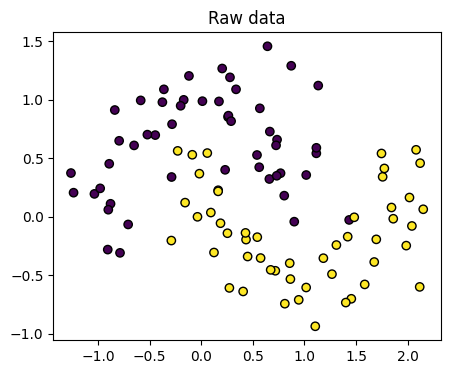

In [5]:
def plot_raw():
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title('Raw data')
    plt.show()

# Uncomment to view the raw data
plot_raw()

## Logistic Regression

In [6]:
def logistic_demo(C=1.0):
    plt.figure(figsize=(5,4))
    clf = LogisticRegression(C=C, solver='lbfgs')
    clf.fit(X, y)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(f'Logistic Regression (C={C:.3g})')
    plt.show()

w.interact(logistic_demo,
           C=w.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1))

interactive(children=(FloatLogSlider(value=1.0, description='C', max=2.0, min=-2.0), Output()), _dom_classes=(…

<function __main__.logistic_demo(C=1.0)>

## Support Vector Machine (SVM)

In [7]:
def svm_demo(C=1.0, kernel='rbf', gamma=1.0):
    plt.figure(figsize=(5,4))
    clf = SVC(C=C, kernel=kernel, gamma=gamma if kernel!='linear' else 'scale')
    clf.fit(X, y)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    # Highlight support vectors
    sv = clf.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)
    plt.title(f'SVM (kernel={kernel}, C={C:.3g}, γ={gamma if kernel!="linear" else "auto"})')
    plt.show()

w.interact(svm_demo,
           C=w.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1),
           kernel=w.Dropdown(options=['linear','rbf','poly'], value='rbf'),
           gamma=w.FloatLogSlider(value=1.0, base=10, min=-1, max=1, step=0.1))

interactive(children=(FloatLogSlider(value=1.0, description='C', max=2.0, min=-2.0), Dropdown(description='ker…

<function __main__.svm_demo(C=1.0, kernel='rbf', gamma=1.0)>

## Decision Tree

In [8]:
def tree_demo(max_depth=3, min_samples_leaf=1):
    plt.figure(figsize=(5,4))
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    clf.fit(X, y)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(f'Decision Tree (depth={max_depth})')
    plt.show()

w.interact(tree_demo,
           max_depth=w.IntSlider(value=3, min=1, max=10, step=1),
           min_samples_leaf=w.IntSlider(value=1, min=1, max=10, step=1))

interactive(children=(IntSlider(value=3, description='max_depth', max=10, min=1), IntSlider(value=1, descripti…

<function __main__.tree_demo(max_depth=3, min_samples_leaf=1)>

## Random Forest

In [9]:
def forest_demo(n_estimators=50, max_depth=5):
    plt.figure(figsize=(5,4))
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth)
    clf.fit(X, y)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(f'Random Forest (trees={n_estimators}, depth={max_depth})')
    plt.show()

w.interact(forest_demo,
           n_estimators=w.IntSlider(value=50, min=1, max=200, step=1),
           max_depth=w.IntSlider(value=5, min=1, max=20, step=1))

interactive(children=(IntSlider(value=50, description='n_estimators', max=200, min=1), IntSlider(value=5, desc…

<function __main__.forest_demo(n_estimators=50, max_depth=5)>

## Multi‑Layer Perceptron (MLP)

In [10]:
def mlp_demo(hidden_layer_size=10, alpha=1e-4, learning_rate_init=1e-3):
    plt.figure(figsize=(5,4))
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                        alpha=alpha,
                        learning_rate_init=learning_rate_init,
                        max_iter=2000,
                        random_state=0)
    clf.fit(X, y)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(f'MLP (hidden={hidden_layer_size}, α={alpha:.1e})')
    plt.show()

w.interact(mlp_demo,
           hidden_layer_size=w.IntSlider(value=10, min=1, max=100, step=1),
           alpha=w.FloatLogSlider(value=1e-4, base=10, min=-5, max=-1, step=0.2),
           learning_rate_init=w.FloatLogSlider(value=1e-3, base=10, min=-4, max=-1, step=0.2))

interactive(children=(IntSlider(value=10, description='hidden_layer_size', min=1), FloatLogSlider(value=0.0001…

<function __main__.mlp_demo(hidden_layer_size=10, alpha=0.0001, learning_rate_init=0.001)>